In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [73]:
w0 = 1
w = 0.3

In [74]:
h = 0.01
t = np.linspace(0,1,200)

In [75]:
def System(r,t):

    g = 9.81
    L = 1

    o,vo = r

    dodt  = vo
    dvodt = (2*g/L-np.square(vo)*np.cos(o))*np.sin(o)/(1/3+np.sin(o)**2)

    return [dodt,dvodt]

In [76]:
def Integrator2(f,r0,t):

    h = t[1]-t[0]

    o = np.zeros(len(t))
    vo = np.zeros(len(t))

    o[0] = r0[0]
    vo[0] = r0[1]

    K1 = np.zeros(2)
    K2 = np.zeros(2)


    for i in range(1,len(t)):
        
        R = np.array([o[i-1],vo[i-1]])

        K1 = f(R,t[i-1])

        R = np.array([o[i-1]+h*K1[0],vo[i-1]+h*K1[1]])

        K2 = f(R,t[i])

        o[i] = o[i-1] + h/2*(K1[0]+K2[0])

        vo[i] = vo[i-1] + h/2*(K1[1]+K2[1])

        if o[i] > np.pi/2:
           return o,vo
                    
    return o,vo

In [77]:
r0 = [10.*np.pi/180,0.]

In [78]:
o,vo = Integrator2(System,r0,t)
sol = integrate.odeint(System,r0,t)

In [79]:
L = 1
y = L/2*np.cos(o)
x = L/2*np.sin(o)

x2 = []
y2 = []

time = True
for i in range(len(x)):
    if x[i] != 0:
        x2.append(x[i])
        y2.append(y[i])
    elif time:
        time = False
        tf = t[i]

In [80]:
xi = L/2*np.sin(sol[:,0])
yi = L/2*np.cos(sol[:,0])

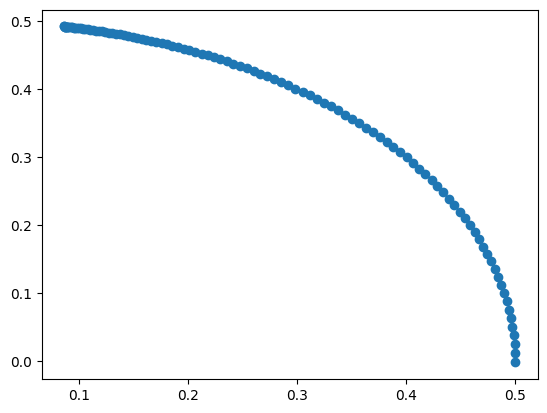

In [81]:
plt.scatter(x2,y2)
#plt.scatter(xi,yi)
#ax.scatter(sol[:,0],sol[:,1],sol[:,2])

In [82]:
tf

0.5226130653266332

El tiempo que le toma a la barra en llegar al piso es: 0.5226s